<a href="https://colab.research.google.com/github/sabinthapa100/Quantum_Computing/blob/main/Quantum_Teleportation_using_Quantum_Entanglement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Entanglement For Quantum Teleportation in Qiskit

# [Entanglement](https://arxiv.org/abs/quant-ph/0603060)

Entanglement is a quantum mechanical phenomenon in which two or more qubits can become linked in a way that their states become dependent on each other. This allows quantum computers to perform certain types of calculations that are not possible with classical computers. 

Entanglement occurs in two or more Hilbert spaces and is not possible on vectors(kets) of the same Hilbert space.

Entanglement is a key ingredient in the quantum teleportation protocol, as it allows for the transfer of quantum information between two distant qubits.


## [Quantum Teleportation](https://arxiv.org/abs/quant-ph/9906110)

Quantum teleportation is a protocol that allows the state of a qubit to be transferred from one location to another **without the physical transfer of the qubit itself**. Entanglement is a key ingredient in this protocol, as it allows for the transfer of quantum information between two distant qubits.


More refs: [ref1](https://journals.aps.org/pra/pdf/10.1103/PhysRevA.58.4394?casa_token=kMU5TMvwfkYAAAAA%3Avs21c23AvxSnnUCliFV3l_MWBCZ8vAsXVrXz2V1uGJ8yesnECFzDF56dDOeSY1awszdzttAM5OyBFoQ), [ref2](https://arxiv.org/abs/quant-ph/0302030)

## [Steps in Quantum Teleportation](https://learn.qiskit.org/course/ch-algorithms/quantum-teleportation)

To understand quantum teleportation, let's consider **a famous but Quantum** Nepali example of **Ram, Shyam and Hari** --- "Hari wants to send a gift (**a quantum gift** - a quantum state $𝝭$  that are entangled, and are held in **Ram's lab** and **Shyam's lab**). 

### Actually, *Ram and Shyam* are "**Mits (मित): their qubit states are entangled (one is from Rara, another is from Solu), quantum-lly**!"

 **Hari** can send his gift $𝝭$ from **Rara** that is **Ram's lab: like quantum- telephone booth that prepares** to **Shyam's lab: quantum telephone booth** *quantum-mechanically* -- using their strength: **entanglement (मित)** -- the process is called **Quantum Teleportation**!

The process involves following steps (in detail with mathematics and circuit/code/explaination involved)!

**First of all, let's prepare ourselves for quantum setup!!!**

Nothing to be memorized!!!

Let's import all the libraries needed for this task!!!



In [47]:
#install qiskit 
!pip install qiskit

#from qiskit, import all the needed libraries
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.visualization import plot_histogram
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import Statevector, partial_trace, state_fidelity

import numpy as np
import math

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

from qiskit.visualization import visualize_transition # We will use this function to run our circuit and visualize its final state

from numpy.random import randint
from random import random
import matplotlib.pyplot as plt
import math


import warnings  # We are using this library to suppress some warning messages
warnings.filterwarnings("ignore")

#provider = IBMQ.load_account()

print("Libraries Imported Successfully!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Libraries Imported Successfully!


### Step 1:

Ram and Shyam share **a Bell pair** (**entanglement (मित)को चिनारी बेल**)!

In [51]:
# Let's prepare 3 qubits and 3 classical bit circuit

qc = QuantumCircuit(3,3)

#where,
# q0 = 𝝭 = Hari's gift for Shyam, sending from Ram's lab
# q1 = Ram's qubit (tool to send Hari's gift - to Shyam!!!!) - in Ram's quantum booth!!!
# q2 = Shyam's qubit - in Shyam's quantum booth (receives the gift 𝝭)!!!

# Mits (मित)'s qubits need to be entangled (by using their quantum strength - 
# yes - Nepal can also have it! ;-))
qc.h(1)
qc.cx(1,2)


#making a barrier and seeing the circuit
qc.barrier()
qc.draw()

░ 
q_0: ───────────░─
     ┌───┐      ░ 
q_1: ┤ H ├──■───░─
     └───┘┌─┴─┐ ░ 
q_2: ─────┤ X ├─░─
          └───┘ ░ 
c: 3/═════════════

### Step 2: **Hari asks Ram** to prepare **a gift** (𝝭) in his booth!

In [52]:
#Let's say Ram want's to send 𝝭 = q0 = any state!
#q0 is initialized at |0> (by default in Qiskit) state - 
#which can be rotated by x-gate to get |1> state

#&&&&&&======[this will prepare the gift in |1> state]=======
q0 = qc.x(0) 



#&&&&&&&===we can define an amplitude (of a quantum state)===UNCOMMENT (two code lines) to play!
#amplitude_0 = (0.5)**(1/2)

#==prepares any state you wanna send===
#qc.prepare_state([amplitude_0, (1 - amplitude_0**2)**(1/2)], 0) 



#make a barrier to visualize the circuit better
qc.barrier()
qc.draw()

░ ┌───┐ ░ 
q_0: ───────────░─┤ X ├─░─
     ┌───┐      ░ └───┘ ░ 
q_1: ┤ H ├──■───░───────░─
     └───┘┌─┴─┐ ░       ░ 
q_2: ─────┤ X ├─░───────░─
          └───┘ ░       ░ 
c: 3/═════════════════════

### Step 3: **Ram** packs the gift: (𝝭) (using Bell state): then he measures (checks) his half of **the Bell pair** and his special state in the "Bell basis"!


 **Ram packs Hari's gift into a quantum packet: qubit and checks if it's alright!**

In [54]:
#packing the gift (𝝭) that is entangling 𝝭 with Ram's qubit
qc.cx(0,1)
qc.h(0)

#measuring Ram's state in the Bell basis: making sure all good!
qc.measure([0,1], [0,1]) 


#for us to see their activities closely!
qc.barrier()
qc.draw(cregbundle = False) 

#using google:
#to visualize the quantum circuit qc without bundling 
#the classical registers

░ ┌───┐ ░      ┌───┐┌─┐ ░      ┌───┐┌─┐ ░ 
q_0: ───────────░─┤ X ├─░───■──┤ H ├┤M├─░───■──┤ H ├┤M├─░─
     ┌───┐      ░ └───┘ ░ ┌─┴─┐└┬─┬┘└╥┘ ░ ┌─┴─┐└┬─┬┘└╥┘ ░ 
q_1: ┤ H ├──■───░───────░─┤ X ├─┤M├──╫──░─┤ X ├─┤M├──╫──░─
     └───┘┌─┴─┐ ░       ░ └───┘ └╥┘  ║  ░ └───┘ └╥┘  ║  ░ 
q_2: ─────┤ X ├─░───────░────────╫───╫──░────────╫───╫──░─
          └───┘ ░       ░        ║   ║  ░        ║   ║  ░ 
c_0: ════════════════════════════╬═══╩═══════════╬═══╩════
                                 ║               ║        
c_1: ════════════════════════════╩═══════════════╩════════
                                                          
c_2: ═════════════════════════════════════════════════════

### Step 4: **Ram calls (sends the classical information: "what's the gift?" info) Shyam over a classical channel**!

### Step 5: Shyam make adjustment of his half of the Bell pair in his quantum booth based on the Ram's call (measurement results - classical!!!) 

This quantum adjustments needed in the quantum circuit:


*   If the *Ram's measurement result* was 1, **apply an X-gate to Shyam's qubit** (Bell state)!

* If the *gift (𝝭: teleportation qubit: q0)* was 1, **apply a Z-gate to the Shyam's qubit**! 

* Then measure Shyam's qubit!

* Gift delivered? (need to confirm!!!)

In [55]:
qc.x(2).c_if(qc.clbits[1], 1)
qc.z(2).c_if(qc.clbits[0], 1)

#measuring Shyam's quit and storing it in 2nd classical bit
qc.measure(2,2) 

qc.draw(cregbundle = False)

░ ┌───┐ ░      ┌───┐┌─┐ ░      ┌───┐┌─┐ ░              
q_0: ───────────░─┤ X ├─░───■──┤ H ├┤M├─░───■──┤ H ├┤M├─░──────────────
     ┌───┐      ░ └───┘ ░ ┌─┴─┐└┬─┬┘└╥┘ ░ ┌─┴─┐└┬─┬┘└╥┘ ░              
q_1: ┤ H ├──■───░───────░─┤ X ├─┤M├──╫──░─┤ X ├─┤M├──╫──░──────────────
     └───┘┌─┴─┐ ░       ░ └───┘ └╥┘  ║  ░ └───┘ └╥┘  ║  ░ ┌───┐┌───┐┌─┐
q_2: ─────┤ X ├─░───────░────────╫───╫──░────────╫───╫──░─┤ X ├┤ Z ├┤M├
          └───┘ ░       ░        ║   ║  ░        ║   ║  ░ └─╥─┘└─╥─┘└╥┘
c_0: ════════════════════════════╬═══╩═══════════╬═══╩══════╬════■═══╬═
                                 ║               ║          ║        ║ 
c_1: ════════════════════════════╩═══════════════╩══════════■════════╬═
                                                                     ║ 
c_2: ════════════════════════════════════════════════════════════════╩═

### Final Check: Simulation and Plot and Confirmation!!!

**In Shyam's quantum booth!!!!**

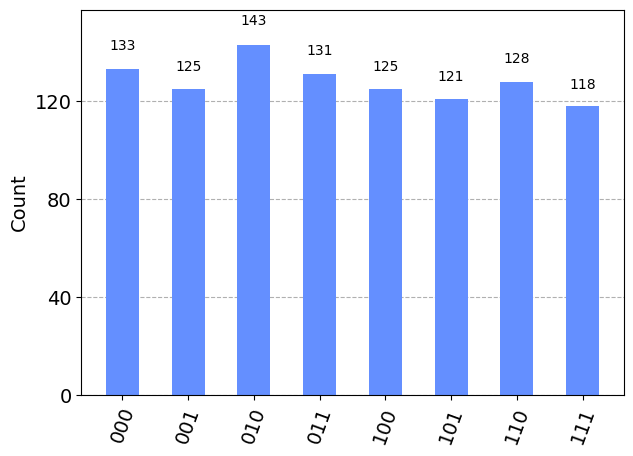

In [56]:
# Simulation and plot of histogram results

#using simulator
backend = Aer.get_backend('qasm_simulator')  
#(you can choose to use real quantum computer in ibm quantum lab!)

job = execute(qc, backend = backend, shots = 1024)

result = job.result()
counts = result.get_counts()

plot_histogram(counts)

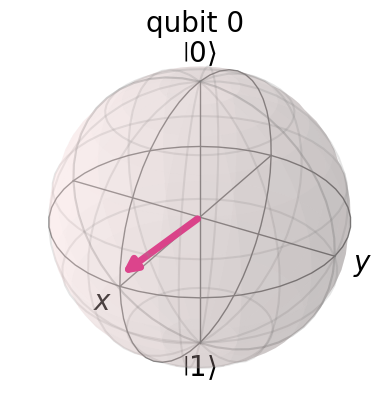

In [57]:
# Shyam's State: let's forget what Ram said (Ram's measurement result)

shyam_state = [0, 0]
for state in result.get_counts().keys():
  shyam_state[int(state[0])] += result.get_counts()[state]

norm = (sum(c**2 for c in shyam_state))**(1/2)
shyam_state = [c / norm for c in shyam_state]

statevector = Statevector(shyam_state)

statevector.draw(output = 'latex')

statevector.draw(output = 'bloch')

## Mathematical Steps of Quantum Teleportation

The mathematical steps involved in the quantum teleportation are:

**Step 1: Ram and Shyam share a pair of entangled qubits in the Bell state:**

\begin{equation}
|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|0\rangle \otimes |1\rangle + |1\rangle \otimes |0\rangle)
\end{equation}

**Step 2: Ram applies a controlled operation (CNOT) on his qubit and the qubit he wants to teleport, and then applies a Hadamard gate to his qubit:**

\begin{equation}
(H \otimes I)(CNOT \otimes I)(|\psi\rangle \otimes |0\rangle) = \frac{1}{2}\sum_{i=0}^{1}(|i\rangle \otimes |i\rangle) \otimes (H|i \oplus \psi\rangle)
\end{equation}

Here, $|\psi\rangle$ represents the qubit that Ram wants to teleport (Hari's gift!!!), and $i$ represents the possible outcomes of the CNOT operation. The $\oplus$ symbol represents the XOR operation, which is applied to the control qubit and the target qubit in the CNOT gate. The Hadamard gate (H) is applied to Ram's qubit after the CNOT gate.

**Step 3: Ram measures both of his qubits and sends the measurement results (two classical bits) to Shyam through classical communication.**

Ram's measurement can be described by a projection operator, $M_{a,b} = |a\rangle \langle a| \otimes |b\rangle \langle b|$, where $a,b \in {0,1}$. Depending on the outcome of her measurement, Ram sends a message to Shyam indicating the measurement result.

**Step 4: Based on the measurement results, Shyam applies a correction operation (X or Z gate) on his qubit to obtain the teleported state:**

* If Ram's measurement results are $00$, Shyam's qubit remains unchanged.

* If Ram's measurement results are $01$, Shyam applies the X gate to his qubit.

* If Ram's measurement results are $10$, Shyam applies the Z gate to his qubit.

* If Ram's measurement results are $11$, Shyam applies both the X and Z gates to his qubit.

This step can be represented mathematically as follows:

\begin{equation}
|\psi\rangle = \sum_{a,b} (-1)^{a \cdot b} M_{a,b} (H \otimes I) (CNOT \otimes I) (|\psi\rangle \otimes |\Phi^+\rangle)
\end{equation}

Here, the $a \cdot b$ term represents the inner product of the measurement results, and the correction gates are applied to Shyam's qubit based on the measurement results.

Step 5: The teleported state is now stored in Shyam's qubit, and the original qubit held by Ram is destroyed.

Shyam's qubit now holds the teleported state, which is identical to the original state held by Ram. Ram's qubit is destroyed during the process.

Overall, quantum teleportation involves the use of entangled qubits and classical communication to transfer the state of a qubit from one

## Quantum Key Distribution (QKD)

QKD stands for Quantum Key Distribution, which is a cryptographic technique that uses the principles of quantum mechanics to establish a secure key between two parties. The key can then be used for secure communication using symmetric encryption.

The basic idea of QKD is to use the properties of quantum particles (usually photons) to create a secure key that cannot be intercepted or copied without detection. In QKD, two parties (usually referred to as Ram and Shyam) exchange quantum bits (qubits) over a communication channel. Since the act of measurement on a quantum system changes its state, any attempt by an eavesdropper (usually referred to as Eve) to intercept the qubits will be detected by Ram and Shyam.

QKD protocols typically involve the use of single photons that are sent over the communication channel in a random sequence. The two parties measure the photons using a basis that is randomly selected for each photon. If the same basis is used by both parties, the measurement results will be correlated. These correlated bits are then used to establish a secure key that can be used for encryption.

There are different types of QKD protocols, such as the BB84 protocol, which was proposed by Charles Bennett and Gilles Brassard in 1984, and the E91 protocol, which was proposed by Artur Ekert in 1991. QKD has already been implemented in a number of experimental settings, and it is considered a promising technology for secure communication in the future.

## Limitations of Quantum teleportation 
Quantum teleportation is not what you think of it seeinc pop culture ideas of teleportation!!!

1. It requires that*** an entangled bell state*** be split between the sending and receiving destinations.
2. Because it requires measuring the bell state, each time you want to perform teleportation, you have to **share a new bell state**!
3. It is **not instantaneous**: requires classical communication (a phone call or email) between the sender and receiver.
4. It is meant for sending **one qubit at a time**, not a whole stuff (or a person!)!

# End of Lab

---

© 2023 Sabin Thapa (for contact, email: sabinthapa240@gmail.com), All rights reserved. 